In [99]:
#import all the necessary libraries

import pandas as pd
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [100]:
#Importing the dataset first
df = pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [101]:
#Inspecting the data frame
df.shape

(167, 10)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [103]:
#Checking the null values
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### 1. Principal Component Analysis

In [104]:
# creating a data frame without country name as for futher analysis only numerical data is required.
df_norm1=df.drop("country",axis=1)


In [105]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df_norm = standard_scaler.fit_transform(df_norm1)



In [106]:
df_norm

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [107]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [108]:
#executing the pca
pca.fit(df_norm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [109]:
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [110]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

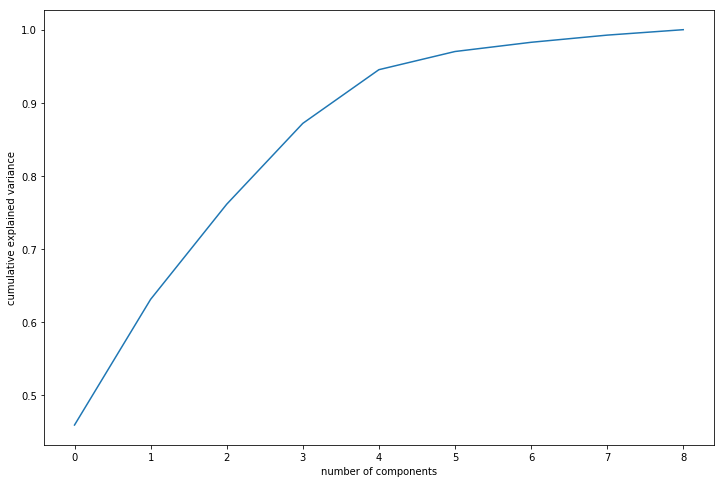

In [111]:
#Plotting the scree plot to check how many Principle components are explaing more than 90% variance
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [112]:
#Chosing 5 principle components and Understanding how the original variables are loaded on the principal components.
colnames = list(df_norm1.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4':pca.components_[3],'PC4':pca.components_[3],'PC5':pca.components_[4]})
pcs_df

,Feature,PC1,PC2,PC3,PC4,PC5
0,child_mort,-0.419519,0.192884,-0.029544,0.370653,-0.168970
1,exports,0.283897,0.613163,0.144761,0.003091,0.057616
2,health,0.150838,-0.243087,-0.596632,0.461897,0.518000
3,imports,0.161482,0.671821,-0.299927,-0.071907,0.255376
4,income,0.398441,0.022536,0.301548,0.392159,-0.247150
5,inflation,-0.193173,-0.008404,0.642520,0.150442,0.714869
6,life_expec,0.425839,-0.222707,0.113919,-0.203797,0.108220
7,total_fer,-0.403729,0.155233,0.019549,0.378304,-0.135262
8,gdpp,0.392645,-0.046022,0.122977,0.531995,-0.180167


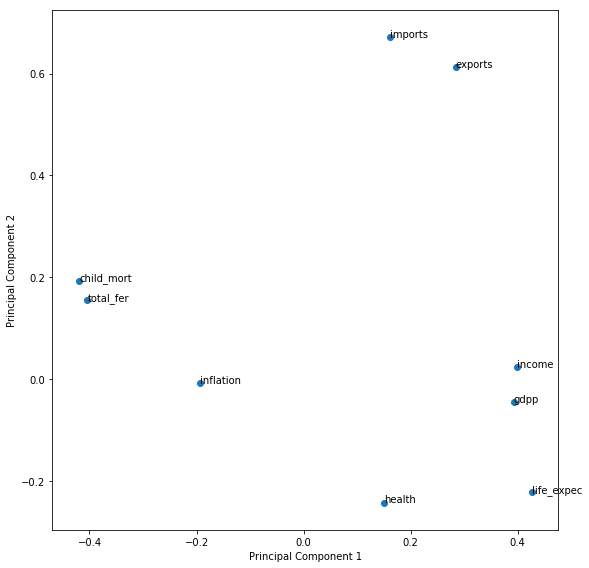

In [113]:
#  visualise how these features are loaded
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [114]:
#Finally let's go ahead and do dimenstionality reduction using the 5 Principal Components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

In [115]:
df_pca = pca_final.fit_transform(df_norm)
df_pca.shape

(167, 5)

In [116]:
df_pca

array([[-2.91299992e+00,  9.19694483e-02, -7.21242475e-01,
         1.00183771e+00, -1.46764708e-01],
       [ 4.29869882e-01, -5.89373005e-01, -3.28611009e-01,
        -1.16501385e+00,  1.53205240e-01],
       [-2.85288747e-01, -4.52138721e-01,  1.23205055e+00,
        -8.57767020e-01,  1.91227155e-01],
       [-2.93271361e+00,  1.69877055e+00,  1.52507602e+00,
         8.55595497e-01, -2.14777969e-01],
       [ 1.03337146e+00,  1.33852736e-01, -2.16699200e-01,
        -8.46637655e-01, -1.93186250e-01],
       [ 2.28903436e-02, -1.77273550e+00,  8.64499533e-01,
        -3.67466174e-02,  9.97895254e-01],
       [-1.01463164e-01, -5.67317984e-01,  2.48106950e-01,
        -1.46602345e+00, -8.58319260e-02],
       [ 2.34215326e+00, -1.98970971e+00,  1.98795068e-01,
         1.11341263e+00, -7.10653789e-01],
       [ 2.97384111e+00, -7.35152104e-01, -5.28284369e-01,
         1.20110137e+00,  8.01665136e-02],
       [-1.81302843e-01, -3.96894805e-01,  8.68398935e-01,
        -4.35201409e-01

In [117]:
#Creating a transpose so that the each column is properly arranged
pc = np.transpose(df_pca)

In [118]:
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3],'PC5':pc[4]})

In [119]:
pcs_df2.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227
3,-2.932714,1.698771,1.525076,0.855595,-0.214778
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186


## Clustering 

In [120]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [121]:
#checking the Hopkins measure, and we are sure to implement clusterting algorithm on the data set as hopkins measure > 0.5
hopkins(pcs_df2)

0.7844786797055531

In [122]:
dat3_1 = pcs_df2

### K- means Clustering

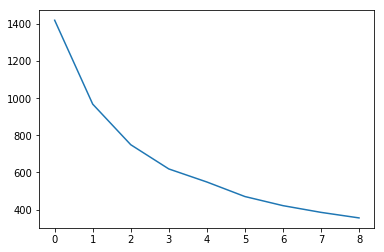

In [123]:

#Now let's proceed to the elbow curve method to decide the number of clusters.
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(dat3_1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [124]:
#Here also we're seeing a distinct bend at around 3 clusters. Hence it seems a good K to choose.
#Let's perform K means using K=3
model_clus2 = KMeans(n_clusters = 3, max_iter=50,random_state = 50)
model_clus2.fit(dat3_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [125]:
dat4=pcs_df2
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus2.labels_)], axis=1)
dat_km.columns = ['PC1', 'PC2','PC3', 'PC4','PC5','ClusterID']
dat_km.head()

,PC1,PC2,PC3,PC4,PC5,ClusterID
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,1
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,2
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,2
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,1
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,2


In [126]:
# Checking country counts in each cluster formed.
dat_km['ClusterID'].value_counts()

2    84
1    47
0    36
Name: ClusterID, dtype: int64

In [127]:
# Merging the data set to see clusterwise assignment in detail
dat5=pd.merge(df,dat_km, left_index=True,right_index=True)
dat5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.913000,0.091969,-0.721242,1.001838,-0.146765,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.429870,-0.589373,-0.328611,-1.165014,0.153205,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.285289,-0.452139,1.232051,-0.857767,0.191227,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-2.932714,1.698771,1.525076,0.855595,-0.214778,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.033371,0.133853,-0.216699,-0.846638,-0.193186,2


In [128]:
dat6=dat5.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
dat6.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


## Analysis of the clusters

In [129]:
#clu_country= 	pd.DataFrame(dat6.groupby(["ClusterID"]).country.mean())
clu_child_mort= 	pd.DataFrame(dat6.groupby(["ClusterID"]).child_mort.mean())
clu_exports = 	pd.DataFrame(dat6.groupby(["ClusterID"]).exports.mean())
clu_health = 	pd.DataFrame(dat6.groupby(["ClusterID"]).health.mean())
clu_imports= 	pd.DataFrame(dat6.groupby(["ClusterID"]).imports.mean())
clu_income= 	pd.DataFrame(dat6.groupby(["ClusterID"]).income.mean())
clu_inflation = 	pd.DataFrame(dat6.groupby(["ClusterID"]).inflation.mean())
clu_life_expec = 	pd.DataFrame(dat6.groupby(["ClusterID"]).life_expec.mean())
clu_total_fer= 	pd.DataFrame(dat6.groupby(["ClusterID"]).total_fer.mean())
clu_gdpp= 	pd.DataFrame(dat6.groupby(["ClusterID"]).gdpp.mean())


In [130]:
df_Kmeans = pd.concat([pd.Series([0,1,2]),clu_child_mort,clu_exports,clu_health,clu_imports,clu_income,clu_inflation,clu_life_expec,clu_total_fer,clu_gdpp], axis=1)

In [131]:
df_Kmeans.columns = ["ClusterID","child_mort","exports","health","imports","income","inflation","life_expec","total_fer","gdpp"]
df_Kmeans
# Cluster ID 1 seems to have direst need of aid.

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,5.000000,58.738889,8.807778,51.491667,45672.222222,2.671250,80.127778,1.752778,42494.444444
1,1,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
2,2,21.927381,40.243917,6.200952,47.473404,12305.595238,7.600905,72.814286,2.307500,6486.452381


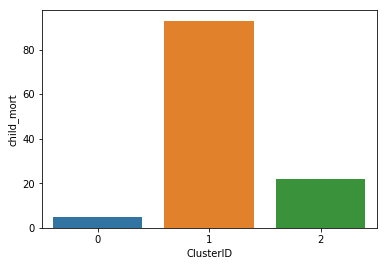

In [132]:
# visualizing the results for child_mort feature.
sns.barplot(x=df_Kmeans.ClusterID, y=df_Kmeans.child_mort)

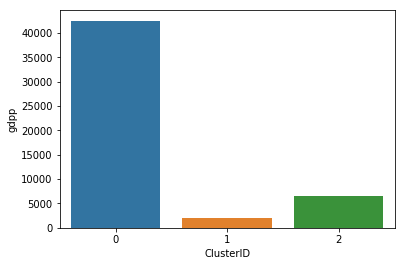

In [133]:
# visualizing the results for gdpp feature.
sns.barplot(x=df_Kmeans.ClusterID, y=df_Kmeans.gdpp)

In [134]:
#Top 5 countries with lowest GDP belongs to ClusterID 1 as expected
dat6.sort_values(by=['gdpp'], inplace=True)

dat6[['ClusterID','country','child_mort','gdpp','income','inflation']].head(5)

,ClusterID,country,child_mort,gdpp,income,inflation
26,1,Burundi,93.6,231,764,12.30
88,1,Liberia,89.3,327,700,5.47
37,1,"Congo, Dem. Rep.",116.0,334,609,20.80
112,1,Niger,123.0,348,814,2.55
132,1,Sierra Leone,160.0,399,1220,17.20


## Heirarchical Clustering

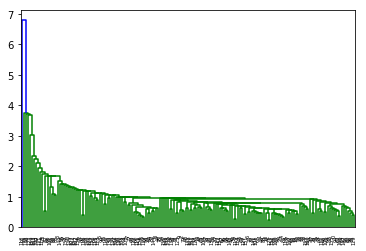

In [135]:
# heirarchical clustering
mergings = linkage(dat3_1, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

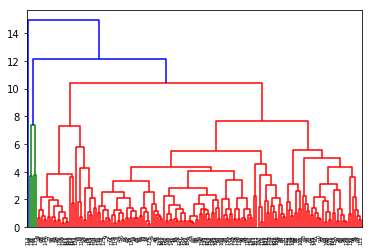

In [136]:
mergings = linkage(dat3_1, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [137]:
#Cutting the dendrogram at an appropriate level and deciding number of clusters k=5

clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
dat_hc = pd.concat([dat4, clusterCut], axis=1)



dat_hc.columns = ['PC1', 'PC2','PC3', 'PC4','PC5','ClusterID']

#RFM_hc.columns = ['CustomerID', 'Frequency', 'Amount', 'Recency', 'ClusterID']
dat_hc.head()

,PC1,PC2,PC3,PC4,PC5,ClusterID
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,0
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,1
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,1
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,0
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,1


In [138]:
# Checking country counts in each cluster formed.
dat_hc['ClusterID'].value_counts()

1    94
0    38
2    30
3     4
4     1
Name: ClusterID, dtype: int64

In [139]:
dat7=pd.merge(df,dat_hc, left_index=True,right_index=True)
dat7.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.913000,0.091969,-0.721242,1.001838,-0.146765,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.429870,-0.589373,-0.328611,-1.165014,0.153205,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.285289,-0.452139,1.232051,-0.857767,0.191227,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-2.932714,1.698771,1.525076,0.855595,-0.214778,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.033371,0.133853,-0.216699,-0.846638,-0.193186,1


## Analysis of the clusters

In [140]:
hc_child_mort= 	pd.DataFrame(dat7.groupby(["ClusterID"]).child_mort.mean())
hc_exports = 	pd.DataFrame(dat7.groupby(["ClusterID"]).exports.mean())
hc_health = 	pd.DataFrame(dat7.groupby(["ClusterID"]).health.mean())
hc_imports= 	pd.DataFrame(dat7.groupby(["ClusterID"]).imports.mean())
hc_income= 	pd.DataFrame(dat7.groupby(["ClusterID"]).income.mean())
hc_inflation = 	pd.DataFrame(dat7.groupby(["ClusterID"]).inflation.mean())
hc_life_expec = 	pd.DataFrame(dat7.groupby(["ClusterID"]).life_expec.mean())
hc_total_fer= 	pd.DataFrame(dat7.groupby(["ClusterID"]).total_fer.mean())
hc_gdpp= 	pd.DataFrame(dat7.groupby(["ClusterID"]).gdpp.mean())

In [141]:
df_hcclus = pd.concat([pd.Series([0,1,2,3,4]),hc_child_mort,hc_exports,hc_health,hc_imports,hc_income,hc_inflation,hc_life_expec,hc_total_fer,hc_gdpp], axis=1)

In [142]:
df_hcclus.columns = ["ClusterID","child_mort","exports","health","imports","income","inflation","life_expec","total_fer","gdpp"]
df_hcclus

# Cluster ID 0 seems to have direst need of aid.

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,96.000000,30.537368,7.028684,47.913158,3508.763158,8.198553,57.884211,5.061579,1793.342105
1,1,25.538298,38.631691,6.183511,45.263467,11871.063830,7.979511,72.460638,2.455106,6878.053191
2,2,6.190000,47.543333,8.701000,38.660000,46543.333333,4.358433,79.790000,1.901333,42150.000000
3,3,6.700000,155.450000,5.945000,144.500000,53125.000000,0.798500,79.425000,1.577500,45875.000000
4,4,130.000000,25.300000,5.070000,17.400000,5150.000000,104.000000,60.500000,5.840000,2330.000000


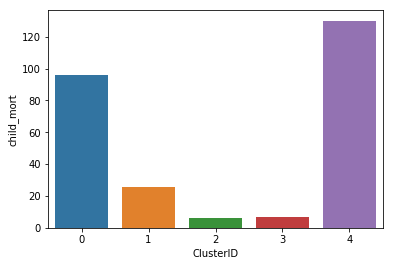

In [143]:
# visualizing the results for child_mort feature.
sns.barplot(x=df_hcclus.ClusterID, y=df_hcclus.child_mort)

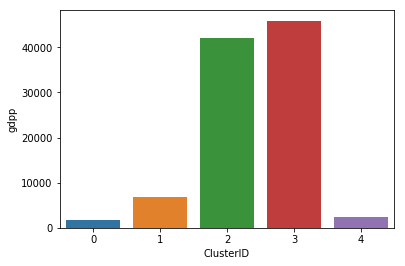

In [144]:
# visualizing the results for gdpp feature.
sns.barplot(x=df_hcclus.ClusterID, y=df_hcclus.gdpp)

In [145]:
#Top 5 countries with lowest GDP belongs to ClusterID 0 as expected
dat7.sort_values(by=['gdpp'], inplace=True)

dat7[['ClusterID','country','child_mort','gdpp','income','inflation']].head(5)

,ClusterID,country,child_mort,gdpp,income,inflation
26,0,Burundi,93.6,231,764,12.30
88,0,Liberia,89.3,327,700,5.47
37,0,"Congo, Dem. Rep.",116.0,334,609,20.80
112,0,Niger,123.0,348,814,2.55
132,0,Sierra Leone,160.0,399,1220,17.20
